# Aceleradev Data Science - Codenation - Semana 3

### Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

print(f'Versão Pandas: {pd.__version__}')
print(f'Versão Numpy: {np.__version__}')

Versão Pandas: 1.0.3
Versão Numpy: 1.18.2


### Bibliotecas de visualização de dados

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use(['seaborn-dark-palette'])

print(f'Versão Seaborn: {sns.__version__}')
print(f'Versão Matplotlib: {matplotlib.__version__}')

Versão Seaborn: 0.10.1
Versão Matplotlib: 3.2.1


### Dicionário de dados

- **`city`**: Cidade onde o imóvel está localizado.
- **`area`**: Área do imóvel.
- **`rooms`**: Número de quartos.
- **`bathroom`**: Número de banheiros.
- **`parking spaces`**: Número de vagas.
- **`floor`**: Andar.
- **`animal`**: Aceita animais?
- **`furniture`**: Mobiliada?
- **`hoa (R$)`**: Valor do condomínio.
- **`rent amount (R$)`**: Valor do Aluguel.
- **`property tax (R$)`**: IPTU.
- **`fire insurance (R$)`**: Seguro Incêndio.
- **`total (R$)`**: Valor total.

### Carregamento dos dados

In [3]:
data_orig = pd.read_csv('houses_to_rent_v2.csv')

### Cópia dos dados

In [4]:
data = data_orig.copy()

### Características dos dados

In [5]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [6]:
print(f'Linhas: {data.shape[0]} | Colunas: {data.shape[1]}')

Linhas: 10692 | Colunas: 13


In [7]:
print(f'Colunas presentes: \n{data.columns.values}')

Colunas presentes: 
['city' 'area' 'rooms' 'bathroom' 'parking spaces' 'floor' 'animal'
 'furniture' 'hoa (R$)' 'rent amount (R$)' 'property tax (R$)'
 'fire insurance (R$)' 'total (R$)']


In [8]:
print(f'Tipos dos dados:\n{data.dtypes.unique()}')

Tipos dos dados:
[dtype('O') dtype('int64')]


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


### Renomeando as colunas

In [10]:
data.columns = ['cidade', 
                'area', 
                'quartos', 
                'banheiros', 
                'numero_vagas', 
                'andar', 
                'animal', 
                'mobiliada', 
                'valor_condominio', 
                'valor_aluguel', 
                'iptu', 
                'seguro_incendio', 
                'valor_total']
data.head()

,cidade,area,quartos,banheiros,numero_vagas,andar,animal,mobiliada,valor_condominio,valor_aluguel,iptu,seguro_incendio,valor_total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Problema: explorar valor do aluguel

### Estatística univariada

In [11]:
data['valor_aluguel'].mean()

3896.247194163861

In [12]:
data['valor_aluguel'].median()

2661.0

In [13]:
data['valor_aluguel'].std()

3408.5455176710816

In [14]:
round(data['valor_aluguel'].describe(), 2)

count    10692.00
mean      3896.25
std       3408.55
min        450.00
25%       1530.00
50%       2661.00
75%       5000.00
max      45000.00
Name: valor_aluguel, dtype: float64

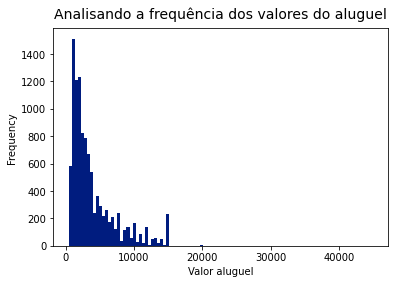

In [15]:
data['valor_aluguel'].plot(kind='hist', bins=100)
plt.title('Analisando a frequência dos valores do aluguel', size=14, y=1.02)
plt.xlabel('Valor aluguel')
plt.show()

In [16]:
data['valor_aluguel'].skew()

1.8388773035440982

In [17]:
data['valor_aluguel'].kurtosis()

4.624228179818687

### Exploração multivariada

#### Qual a cidade com a média de aluguel mais alto? 

In [19]:
data.groupby(['cidade'])['valor_aluguel'].mean().reset_index().sort_values('valor_aluguel', ascending=False)

,cidade,valor_aluguel
4,São Paulo,4652.793783
0,Belo Horizonte,3664.127981
3,Rio de Janeiro,3232.904064
1,Campinas,2364.290739
2,Porto Alegre,2337.699916


####  Quantos banheiros, em média, existem nas residências com aluguéis mais altos? 

Os alugueis mais altos serão considerados aqueles com valores acima do percentil 75%.

In [20]:
data['aluguel_alto'] = ['alto' if x > 5000 else 'baixo' for x in data['valor_aluguel']]

In [22]:
data.groupby(['aluguel_alto'])['banheiros'].mean().reset_index()

,aluguel_alto,banheiros
0,alto,3.729027
1,baixo,1.772108


####  Os imóveis mais caros aceitam animal? 

In [23]:
aux = data[data['aluguel_alto']=='alto']
aux['animal'].value_counts().reset_index()

,index,animal
0,acept,2084
1,not acept,455


#### Os imóveis mais caros são mobiliados? 

In [24]:
aux['mobiliada'].value_counts().reset_index()

,index,mobiliada
0,not furnished,1661
1,furnished,878


### Hipóteses

- São Paulo é a cidade com o aluguel mais caro.
- Quanto mais banheiros em um imovel maior o valor do aluguel.
- Os imoveis com mobilia tem o aluguel mais alto. 

In [25]:
data[['valor_aluguel', 'banheiros']].corr(method='spearman')

,valor_aluguel,banheiros
valor_aluguel,1.00000,0.71589
banheiros,0.71589,1.00000


In [26]:
aux = pd.DataFrame({'colunas' : data.columns, 'tipos' : data.dtypes})
lista = list(aux[aux['tipos'] == 'int64']['colunas'])

for col in lista:
    print(f'Coluna: {col}\n')
    print(data[['valor_aluguel', col]].corr(method = 'spearman'))

Coluna: area

               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000
Coluna: quartos

               valor_aluguel   quartos
valor_aluguel       1.000000  0.600969
quartos             0.600969  1.000000
Coluna: banheiros

               valor_aluguel  banheiros
valor_aluguel        1.00000    0.71589
banheiros            0.71589    1.00000
Coluna: numero_vagas

               valor_aluguel  numero_vagas
valor_aluguel       1.000000      0.620175
numero_vagas        0.620175      1.000000
Coluna: valor_condominio

                  valor_aluguel  valor_condominio
valor_aluguel          1.000000          0.355785
valor_condominio       0.355785          1.000000
Coluna: valor_aluguel

               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0
Coluna: iptu

               valor_aluguel     iptu
valor_aluguel        1.00000  0.65923
iptu                 0.6